# Python para economistas

### Dados macroeconômicos

Neste seção iremos abordar o uso de dados macroeconômicos no Python. Primeiramente, iremos mostrar algumas operações comuns a dados de séries temporais. Na segunda parte, colocaremos alguns exemplos de análises macroeconômicas:Curva de Philips, Curva de juros e Convergência de renda.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.dpi'] = 150

# Transformações de séries temporais

Nesta parte mostraremos algumas transformações bastante utilizadas em séries temporais. Para isso, iremos demonstra-las nos dados do índice Ibovespa, obtido pelo pacote **pyIpeaData** com o código abaixo. 

In [21]:
import pyIpeaData as ipea

ibovespa = ipea.get_serie("GM366_IBVSP366")[["VALDATA", "VALVALOR"]]
ibovespa = ibovespa.dropna()
ibovespa = ibovespa.rename({'VALDATA': 'data', 'VALVALOR': 'ibovespa'}, axis=1)
ibovespa['data'] = pd.to_datetime(ibovespa['data'].str[:10], format = '%Y-%m-%d')

ibovespa

,data,ibovespa
0,1994-07-04,3580.8
1,1994-07-05,3564.3
2,1994-07-06,3753.5
3,1994-07-07,3904.9
4,1994-07-08,4051.9
...,...,...
9213,2021-07-02,127622.0
9214,2021-07-05,126920.0
9215,2021-07-06,125095.0
9216,2021-07-07,127019.0


Como já vimos anteriormente, fazer um gráfico de linha com o seaborn é bastante simples. Basta colocar as variáveis nos eixos x e y. 

<AxesSubplot:xlabel='data', ylabel='ibovespa'>

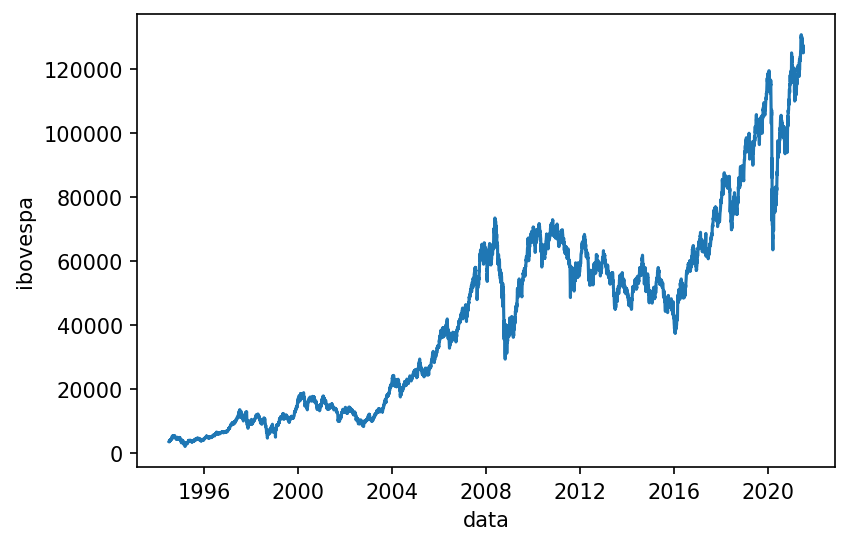

In [22]:
sns.lineplot(data=ibovespa, x="data", y="ibovespa")

## Lag

Uma função com uso recorrente no tratamento de séries temporais é criar uma nova coluna com o lag de de uma das variáveis da base de dados. O lag(1) da variável $X_{t}$ é igual a $X_{t-1}$. Para fazer essa operação, utilizamos a função *shift* com número de períodos que queremos fazer o lag.

In [23]:
ibovespa["ibovespa_lag1"] = ibovespa["ibovespa"].shift(-1)
ibovespa["ibovespa_lag5"] = ibovespa["ibovespa"].shift(-5)

ibovespa

,data,ibovespa,ibovespa_lag1,ibovespa_lag5
0,1994-07-04,3580.8,3564.3,4010.8
1,1994-07-05,3564.3,3753.5,3919.7
2,1994-07-06,3753.5,3904.9,3840.8
3,1994-07-07,3904.9,4051.9,4016.5
4,1994-07-08,4051.9,4010.8,4079.9
...,...,...,...,...
9213,2021-07-02,127622.0,126920.0,NaN
9214,2021-07-05,126920.0,125095.0,NaN
9215,2021-07-06,125095.0,127019.0,NaN
9216,2021-07-07,127019.0,125428.0,NaN


## Diferenciação

Outra função bastante recorrente é tomar as diferenças de uma variável, de forma que ela se torne estacionária. A diferença é basicamente a subtração de $X_{t}$ por $X_{t-n}$, sendo $n$ normalmente igual a 1. Se os dados tiverem sazonalidade, pode ser interessante fazer utilizar outros valores de $n$.

<AxesSubplot:xlabel='data', ylabel='ibovespa_diff5'>

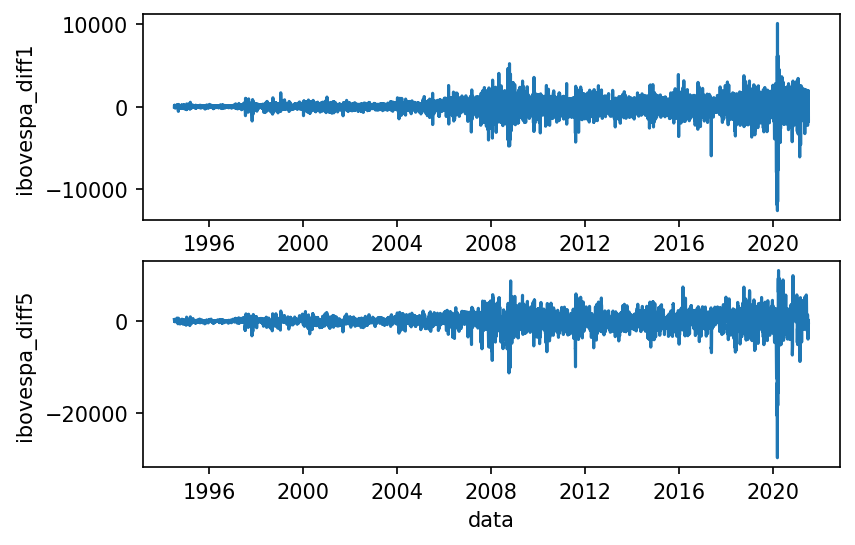

In [24]:
ibovespa["ibovespa_diff1"] = ibovespa["ibovespa"].diff(1)
ibovespa["ibovespa_diff5"] = ibovespa["ibovespa"].diff(5)

fig, axs = plt.subplots(nrows=2)

sns.lineplot(data=ibovespa, x="data", y="ibovespa_diff1", ax=axs[0])
sns.lineplot(data=ibovespa, x="data", y="ibovespa_diff5", ax=axs[1])

## Médias móveis

Médias móveis, como o nome diz, faz o cálculo da média de uma variável em um subconjunto de $n-1$ observações anteriores e a observação atual. Se utilizarmos um período de 5 dias, a média móvel de $X_{t}$ será então:  

$$Y_{t} = \frac{X_{t} + X_{t-1} + X_{t-2} + X_{t-3} + X_{t-4}}{5}$$

Para fazer isso, utilizamos a função *rolling*, que cria janelas de dados de $n$ dias. Após, utilizamos a função *mean*, para criar a média nestas janelas.

In [25]:
ibovespa["ibovespa_MA21"] = ibovespa["ibovespa"].rolling(window=21).mean()
ibovespa

,data,ibovespa,ibovespa_lag1,ibovespa_lag5,ibovespa_diff1,ibovespa_diff5,ibovespa_MA21
0,1994-07-04,3580.8,3564.3,4010.8,NaN,NaN,NaN
1,1994-07-05,3564.3,3753.5,3919.7,-16.5,NaN,NaN
2,1994-07-06,3753.5,3904.9,3840.8,189.2,NaN,NaN
3,1994-07-07,3904.9,4051.9,4016.5,151.4,NaN,NaN
4,1994-07-08,4051.9,4010.8,4079.9,147.0,NaN,NaN
...,...,...,...,...,...,...,...
9213,2021-07-02,127622.0,126920.0,NaN,1956.0,366.0,128771.857143
9214,2021-07-05,126920.0,125095.0,NaN,-702.0,-509.0,128619.190476
9215,2021-07-06,125095.0,127019.0,NaN,-1825.0,-2232.0,128348.666667
9216,2021-07-07,127019.0,125428.0,NaN,1924.0,217.0,128216.857143


(array([18262., 18322., 18383., 18444., 18506., 18567., 18628., 18687.,
        18748., 18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

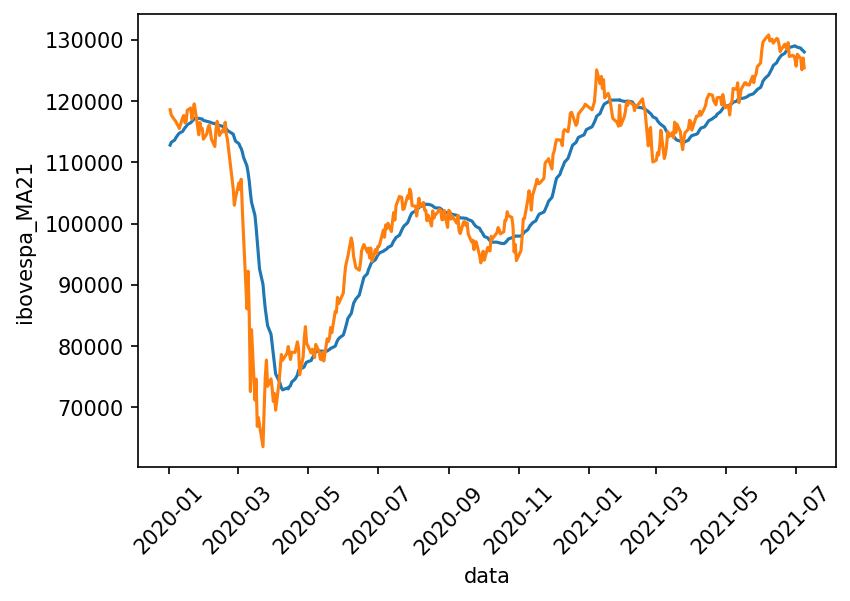

In [26]:
sns.lineplot(data=ibovespa[ibovespa["data"] > "2020-01-01"],
             x="data", y="ibovespa_MA21")
sns.lineplot(data=ibovespa[ibovespa["data"] > "2020-01-01"],
             x="data", y="ibovespa")
plt.xticks(rotation=45);

## Deflacionando a série

Muitas vezes é necessário deflacionar uma variável para fazer alguma análise. Para isso, utilizaremos o IPCA para deflacionar o índice Ibovespa. Também podemos extrair a série utilizando o pacote do IPEA. Iremos normalizar o índice para ter base = 1 em Julho de 1994.

In [27]:
ipca = ipea.get_serie('PRECOS12_IPCA12')[["VALDATA", "VALVALOR"]]
ipca = ipca.rename({'VALDATA': 'data', 'VALVALOR': 'ipca'}, axis=1)

ipca['data'] = pd.to_datetime(ipca['data'].str[:10], format = '%Y-%m-%d')

ipca_07_1994 = int(ipca[ipca["data"] == "1994-07-01"]["ipca"])
ipca["ipca"] = ipca["ipca"]/ipca_07_1994

ipca

,data,ipca
0,1979-12-01,8.326011e-12
1,1980-01-01,8.876831e-12
2,1980-02-01,9.286667e-12
3,1980-03-01,9.847432e-12
4,1980-04-01,1.036798e-11
...,...,...
494,2021-02-01,6.144732e+00
495,2021-03-01,6.201880e+00
496,2021-04-01,6.221104e+00
497,2021-05-01,6.272743e+00


Um problema nesse caso é de que os dados do IPCA são mensais, já os nossos dados são diários. Por isso, iremos transformar a nossa base de dados para ela ter uma periodicidade mensal. A função *MonthBegin* com n = 1 leva todos os dados para o começo do próprio mês, no dia 1. Assim, teremos vários dados duplicados na coluna de data. Como os dados estão ordenados cronológicamente, podemos selecionar o primeiro dado de cada mês removendo os dados duplicados, utilizando a função *drop_duplicates*.

In [28]:
from pandas.tseries.offsets import MonthBegin

ibovespa["data"] = ibovespa["data"] - MonthBegin(1)
ibovespa = ibovespa.drop_duplicates(subset ="data", keep = "first")

Assim, basta juntarmos os dois dataframes pela coluna "data". Em seguida, iremos dividir o valor do Ibovespa pelo IPCA para criar a variável deflacionada.

In [29]:
ibovespa = ibovespa.merge(ipca, on = "data", how = "inner") 

ibovespa["ibovespa_deflac"] = ibovespa["ibovespa"]/ibovespa["ipca"]

ibovespa

,data,ibovespa,ibovespa_lag1,ibovespa_lag5,ibovespa_diff1,ibovespa_diff5,ibovespa_MA21,ipca,ibovespa_deflac
0,1994-07-01,3580.8,3564.3,4010.8,NaN,NaN,NaN,1.001016,3577.164194
1,1994-08-01,4310.7,4392.1,4558.2,158.7,233.5,4011.723810,1.019639,4227.671308
2,1994-09-01,5367.4,4804.0,5510.9,-69.5,153.1,4998.280952,1.035235,5184.716650
3,1994-10-01,5335.1,5166.8,4925.9,-148.9,70.1,5311.709524,1.062361,5021.929202
4,1994-11-01,4508.0,4666.6,4992.5,-192.8,-155.7,4810.719048,1.092208,4127.420275
...,...,...,...,...,...,...,...,...,...
319,2021-02-01,118234.0,119725.0,119429.0,869.0,1770.0,119904.619048,6.144732,19241.521904
320,2021-03-01,111540.0,111184.0,111331.0,1205.0,-3687.0,116772.180476,6.201880,17984.869738
321,2021-04-01,117518.0,117499.0,118812.0,2265.0,2737.0,114573.857143,6.221104,18890.216801
322,2021-05-01,119209.0,117712.0,121909.0,315.0,-1386.0,119247.523810,6.272743,19004.285172


<AxesSubplot:xlabel='data', ylabel='ibovespa_deflac'>

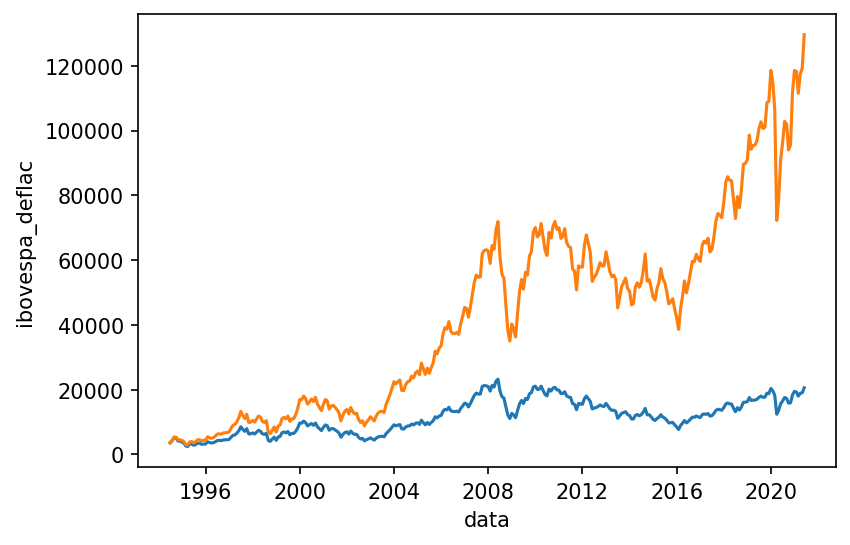

In [32]:
sns.lineplot(data=ibovespa, x="data", y="ibovespa_deflac")
sns.lineplot(data=ibovespa, x="data", y="ibovespa")

# Curva de Philips

A curva de Phillips é um conceito econômico que afirma que a inflação e o desemprego têm uma relação inversa. A lógica é de que com o crescimento econômico vem a inflação, que por sua vez deve levar a uma menor taxa de desemprego. Utilizaremos novamente os dados do IPCA. Além deles, utilizaremos a taxa de desocupação da PNAD, também obtida junto ao IpeaData. 

In [35]:
import pyIpeaData as ipea

ipca = ipea.get_serie('PRECOS12_IPCAG12')
desemprego = ipea.get_serie("PAN12_TDESOC12")

In [36]:
ipca = ipca[["VALDATA", "VALVALOR"]].rename(columns={"VALDATA": "data",
                                                     "VALVALOR": "ipca"})
ipca

,data,ipca
0,1980-01-01T00:00:00-02:00,6.615649
1,1980-02-01T00:00:00-02:00,4.616919
2,1980-03-01T00:00:00-03:00,6.038389
3,1980-04-01T00:00:00-03:00,5.286114
4,1980-05-01T00:00:00-03:00,5.702721
...,...,...
493,2021-02-01T00:00:00-03:00,0.860000
494,2021-03-01T00:00:00-03:00,0.930000
495,2021-04-01T00:00:00-03:00,0.310000
496,2021-05-01T00:00:00-03:00,0.830000


In [37]:
desemprego = desemprego[["VALDATA", "VALVALOR"]].rename(columns={"VALDATA": "data",
                                                                 "VALVALOR": "desemprego"})
desemprego

,data,desemprego
0,2012-03-01T00:00:00-03:00,7.9
1,2012-04-01T00:00:00-03:00,7.7
2,2012-05-01T00:00:00-03:00,7.6
3,2012-06-01T00:00:00-03:00,7.5
4,2012-07-01T00:00:00-03:00,7.4
...,...,...
105,2020-12-01T00:00:00-03:00,13.9
106,2021-01-01T00:00:00-03:00,14.2
107,2021-02-01T00:00:00-03:00,14.4
108,2021-03-01T00:00:00-03:00,14.7


Juntamos os dois dados pela coluna de "data".

In [38]:
philips = desemprego.merge(ipca, on='data', how='left')
philips

,data,desemprego,ipca
0,2012-03-01T00:00:00-03:00,7.9,0.21
1,2012-04-01T00:00:00-03:00,7.7,0.64
2,2012-05-01T00:00:00-03:00,7.6,0.36
3,2012-06-01T00:00:00-03:00,7.5,0.08
4,2012-07-01T00:00:00-03:00,7.4,0.43
...,...,...,...
105,2020-12-01T00:00:00-03:00,13.9,1.35
106,2021-01-01T00:00:00-03:00,14.2,0.25
107,2021-02-01T00:00:00-03:00,14.4,0.86
108,2021-03-01T00:00:00-03:00,14.7,0.93


Assim podemos mostrar a relação com um gráfico *regplot*, que coloca uma linha de regressão no gráfico de dispersão.

<AxesSubplot:xlabel='desemprego_lag1', ylabel='ipca'>

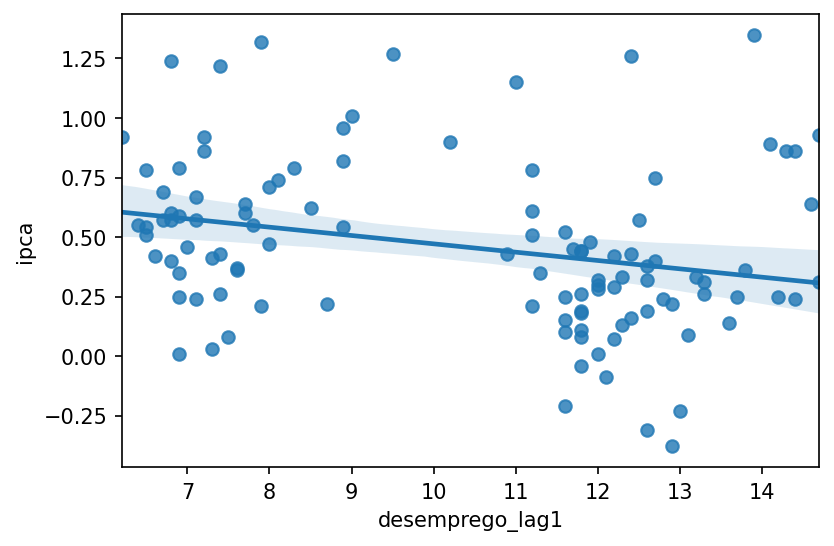

In [48]:
sns.regplot(x="desemprego", y="ipca", data=philips)

# Curva de Juros

Agora iremos mostrar como plotar o gráfico da curva de juros, ou curva a termo. Para isso, utilizaremos o pacote *investpy*, que extrai dados financeiros do Investing.com. Com ele, podemos obter preços de ações, commodities, moedas e títulos. No caso dos título, podemos obter dados de vários países para vários prazos de maturação.  

Primeiramente iremos utilizar a função *get_bonds*, que retorna quais títulos temos disponíveis para o país em questão. Com essa informação, iremos obter os dados históricos deles do período de primeiro de Janeiro de 2021 até primeiro de Julho do mesmo ano, e colocar em uma lista. Depois, transformamos os dados em um dataframe para criar o gráfico da curva. 

In [168]:
import investpy as inv

resumoBR  = inv.get_bonds('brazil')

lista_br = []
for i in resumoBR["name"]:
    df = inv.get_bond_historical_data(i, from_date='01/01/2021',
                                      to_date='01/07/2021')
    df["name"] = i
    lista_br.append(df)
    
    
br = pd.concat(lista_br)

O gráfico é criado normalmente com o *lineplot* do Seaborn. Entretanto, é preciso construir a escala de cor para termos um gradiente de cores, com a função *ScalarMappable*. 

<ipython-input-170-f64ab9d78d7f>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%d %b %Y'))


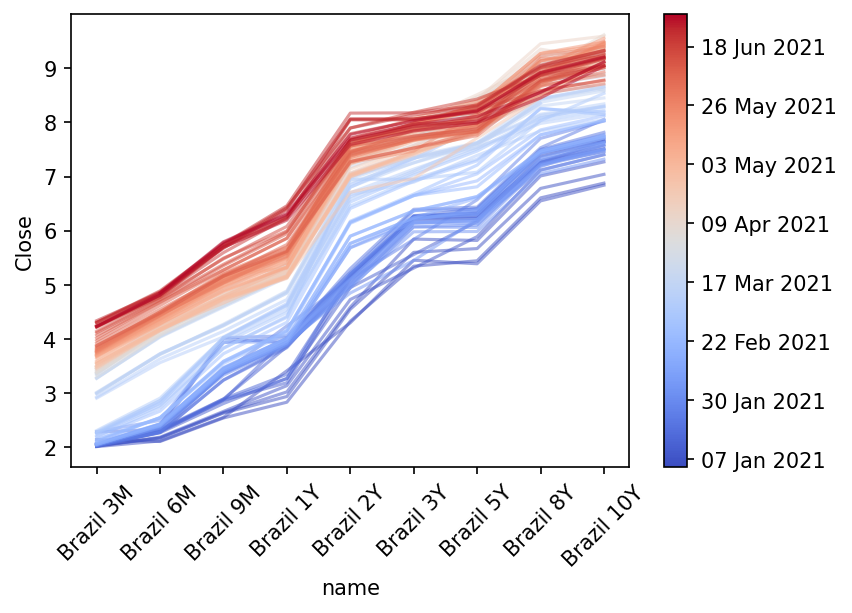

In [170]:
sns.lineplot(x = br["name"], 
             y = br["Close"], 
             hue=br.index.values.astype(float),
             legend = False,
             palette='coolwarm',
             alpha=0.5)

sm = plt.cm.ScalarMappable(cmap='coolwarm', 
                           norm=plt.Normalize(vmin=br.index.min().value,
                                              vmax=br.index.max().value))

cbar = plt.colorbar(sm);
date = pd.to_datetime(cbar.get_ticks()
cbar.ax.set_yticklabels(date).strftime(date_format='%d %b %Y'))

plt.xticks(rotation=45);

# Convergência de renda

Para dados macroeconômicos internacionais, o Banco Mundial e o FMI são boas opções de fontes de dados. Para mostrar um exemplo, iremos extrair dados de PIB per capita e comparar o crescimento de países ricos e pobres nos últimos 20 anos. Espera-se que a relação encontrada seja negativa. Ou seja, quanto maior a renda per capita inicial, menor o crescimento. Essa hipótese é chamada de convergência de renda. 

Para extrair dados do banco mundial, utilizamos a biblioteca *wbgapi*. Assim, incluímos o código da variável "NY.GDP.PCAP.CD" na função *data.DataFrame* do pacote.

In [176]:
import wbgapi as wb
pib = wb.data.DataFrame("NY.GDP.PCAP.CD", time=[2001,2019],
                        skipBlanks=True, columns='series')
pib.reset_index(inplace = True)

In [177]:
pib

,economy,time,NY.GDP.PCAP.CD
0,ABW,YR2001,20670.367005
1,AFE,YR2001,591.088444
2,AFE,YR2019,1481.425292
3,AFG,YR2019,507.103392
4,AFW,YR2001,516.927934
...,...,...,...
487,ZAF,YR2019,6001.401121
488,ZMB,YR2001,382.941035
489,ZMB,YR2019,1305.002214
490,ZWE,YR2001,568.386291


Como precisamos construir o crescimento do PIB per capita, é necessário que aja o dado tanto em 2001, quanto em 2019. Portanto, iremos agrupar por país e filtrar aqueles que não tiverem duas observações.

In [180]:
pib.set_index("economy", inplace=True)
pib = pib[pib.groupby(level=0).size() > 1]

<ipython-input-180-c929c97e26e6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pib = pib[pib.groupby(level=0).size() > 1]


Criamos a taxa de crescimento para cada grupo (país) com a função *pct_change*. Iremos tirar os NAN, que são as observações de 2001.

In [187]:
crescimento = pib.groupby("economy")["NY.GDP.PCAP.CD"].pct_change().dropna()
crescimento = pd.DataFrame(crescimento).rename(columns={"NY.GDP.PCAP.CD":
                                                        "crescimento"})
crescimento

,crescimento
economy,
AFE,1.506267
AFW,2.428600
AGO,4.327987
ALB,3.178839
AND,0.780427
...,...
WSM,1.777202
XKX,1.983096
ZAF,1.250687


Voltando a base do PIB per capita, selecionamos apenas as observações de 2001. Em seguida, juntamos as duas bases pelo nome dos países ("economy") e aplicamos log no PIB per capita de 2001.

In [181]:
pib2001 = pib[pib["time"] == "YR2001"].rename(columns={"NY.GDP.PCAP.CD":
                                                       "PIB_2001"})

converg = pib2001.merge(crescimento, on='economy', how='left')
converg["log_PIB2001"] = np.log(converg["PIB_2001"])

In [1]:
!pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\bebezi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Com isso, mostramos a relação com o *regplot*, novamente.

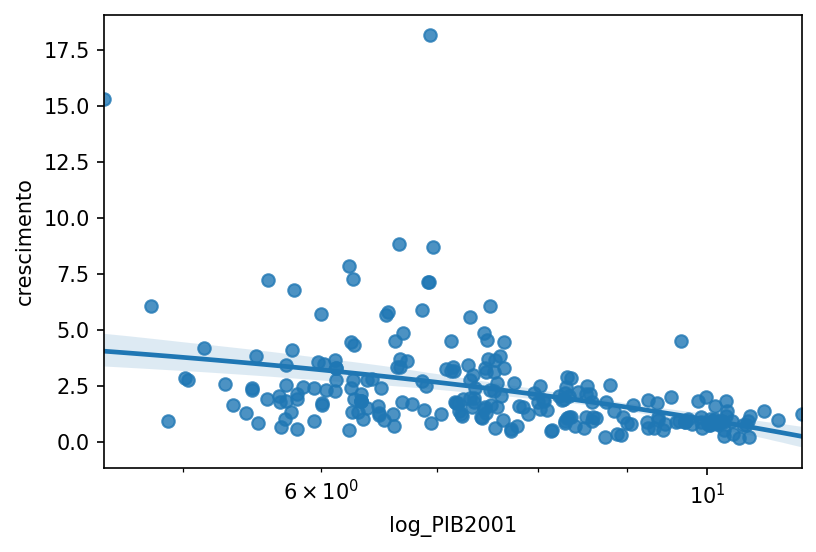

In [179]:
sns.regplot(data=converg, x="log_PIB2001", y="crescimento")
plt.xscale('log')